# Cosa faremo

### Una banca si accorge di perdere molto denaro nei prestiti di piccola entità!!!
### Il vostro lavoro, in quanto consulenti, sarà quello di:
- sviluppare una pagina web per la richiesta di nuovi prestiti
- sviluppare un'analisi per capire quali prestiti sono rischiosi e quali no
- applicare questa analisi in modo che le richieste vengano filtrate a priori

# Cosa abbiamo a disposizione

## file csv con i prestiti di piccola taglia degli ultimi due anni

# Tipico Workflow di ML

1. Acquisizione Dati
2. Pulizia Dati
3. Esplorazione Visiva
4. Trasformazione (eventuale) e Scelta del Modello
5. Misurazione delle performance del Modello

# Con l'aggiunta di:

6. Deploying del Modello as a service
7. Collegamento dell'API alla Web Application

# Acquisizione Dati

In [1]:
import pandas as pd

df = pd.read_csv("storico_prestiti.csv")
df.head()

,default,amount,grade,years,ownership,income,age
0,0,1000,B,2.0,RENT,19200.0,24
1,1,6500,A,2.0,MORTGAGE,66000.0,28
2,0,2400,A,2.0,RENT,60000.0,36
3,0,10000,C,3.0,RENT,62000.0,24
4,1,4000,C,2.0,RENT,20000.0,28


# Pulizia dei Dati

# Di che tipo sono i dati presenti nel DataFrame?

In [2]:
df.dtypes

default        int64
amount         int64
grade         object
years        float64
ownership     object
income       float64
age            int64
dtype: object

# Quanti dati ho?

In [3]:
print("Righe: {0}, Colonne: {1}".format(*df.shape))

Righe: 7727, Colonne: 7


In [4]:
df.describe()

,default,amount,years,income,age
count,7727.000000,7727.000000,7448.000000,7.727000e+03,7727.000000
mean,0.478452,9453.345412,6.086332,6.337197e+04,27.542125
std,0.499568,6298.595800,6.700758,4.687195e+04,6.132121
min,0.000000,500.000000,0.000000,4.000000e+03,20.000000
25%,0.000000,5000.000000,2.000000,3.700000e+04,23.000000
50%,0.000000,8000.000000,4.000000,5.400000e+04,26.000000
75%,1.000000,12000.000000,8.000000,7.679650e+04,30.000000
max,1.000000,35000.000000,62.000000,1.200000e+06,94.000000


# Come verifico se ho dei valori nulli?

In [5]:
df.isnull().sum()

default        0
amount         0
grade          0
years        279
ownership      0
income         0
age            0
dtype: int64

# Cosa posso fare con queste righe?

1. Eliminarle (sono 279 su 7727)
2. Sostituirle con un valore soglia (es. 9999 -> Errore nell'importazione)
3. Sostituirle applicando una funzione (random tra le altre righe, media, valore stimato da un altro modello)

# Scelgo la 3 
### (media aritmetica)

In [6]:
import numpy as np

df.years = df.years.fillna(np.mean(df.years))

# GRAFICI
### (Data Visualization)

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (8,6)
plt.style.use('ggplot')
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Univariate Analysis
## grafici riferiti all'output o a una singola feature
### feature = una colonna del dataset che non sia "default"

### Prestiti andati a buon fine o meno

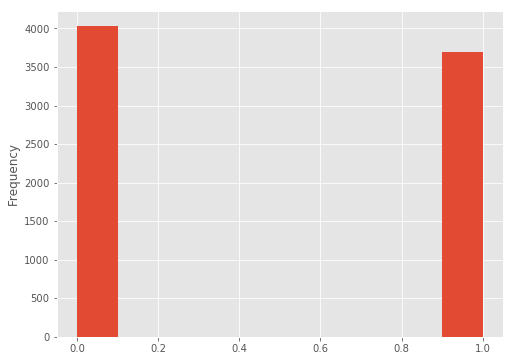

In [8]:
df.default.plot.hist()

#### Grafico dei livelli di solvibilità del cliente

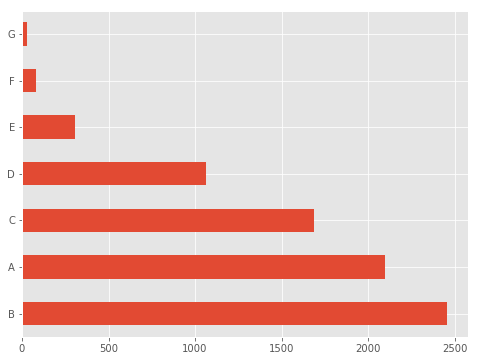

In [9]:
df.grade.value_counts().plot.barh()

### Età dei richiedenti

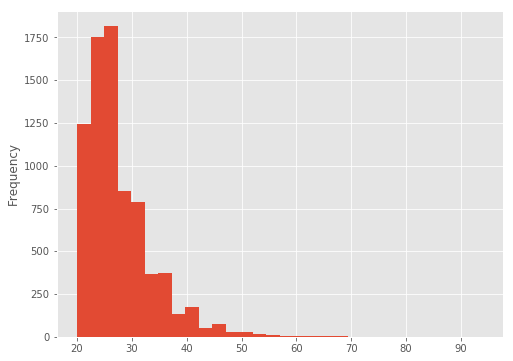

In [10]:
df.age.plot.hist(bins=30)

## Analisi Multivariabile
### Grafici a due e più variabili

#### Grafico età-disponibilità economica

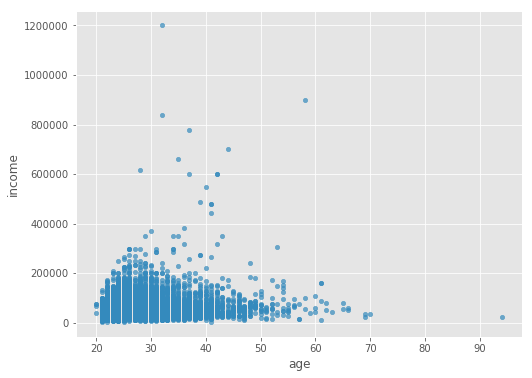

In [11]:
df.plot.scatter(x='age', y='income', alpha=0.7)

#### Relazione tra età, disponibilità economica e default del prestito

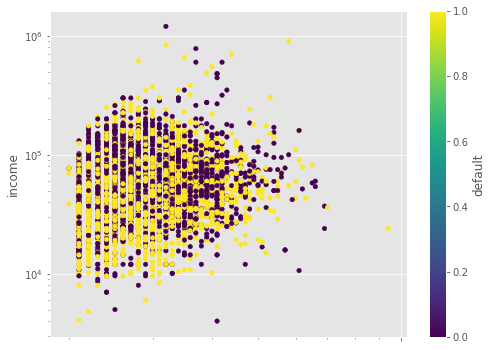

In [12]:
df.plot.scatter(x='age', y='income', c='default', logx=True, logy=True, cmap='viridis')

# Trasformazione dei valori non numerici

In [13]:
df.describe(include='all')

,default,amount,grade,years,ownership,income,age
count,7727.00,7727.00,7727,7727.00,7727,7727.00,7727.00
unique,nan,nan,7,nan,4,nan,nan
top,nan,nan,B,nan,RENT,nan,nan
freq,nan,nan,2456,nan,4054,nan,nan
mean,0.48,9453.35,NaN,6.09,NaN,63371.97,27.54
std,0.50,6298.60,NaN,6.58,NaN,46871.95,6.13
min,0.00,500.00,NaN,0.00,NaN,4000.00,20.00
25%,0.00,5000.00,NaN,2.00,NaN,37000.00,23.00
50%,0.00,8000.00,NaN,4.00,NaN,54000.00,26.00
75%,1.00,12000.00,NaN,8.00,NaN,76796.50,30.00


In [14]:
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()

le_grade = LabelEncoder().fit(df_encoded["grade"])
df_encoded.grade = le_grade.transform(df_encoded.grade)

le_ownership = LabelEncoder().fit(df["ownership"])
df_encoded.ownership = le_ownership.transform(df_encoded.ownership)

In [15]:
df_encoded.head()

,default,amount,grade,years,ownership,income,age
0,0,1000,1,2.00,3,19200.00,24
1,1,6500,0,2.00,0,66000.00,28
2,0,2400,0,2.00,3,60000.00,36
3,0,10000,2,3.00,3,62000.00,24
4,1,4000,2,2.00,3,20000.00,28


# Modello

### Apprendimento Supervisionato vs Apprendimento non Supervisionato

1. Regressione Lineare 
2. Classificatori Bayesiani 
3. Reti Neurali Artificiali 
4. Alberi Decisionali e Foreste

5. Clustering
6. PCA e vari (dimensionality reduction)
7. Apriori

# Alberi Decisionali

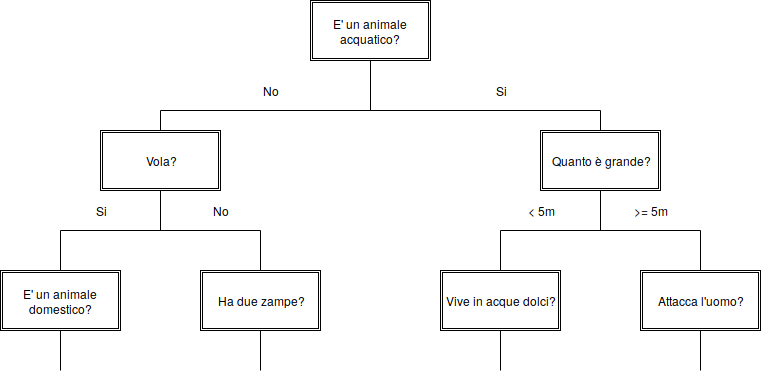

In [16]:
from IPython.display import Image
Image("img/decisionanimals.png")

## Utilizzo
- previsione di variabili continue che categoriche

## Fine
- scrivere un programma in grado di costruire una serie di "domande" a partire dai dati di storico

### Criterio di partizione: Algoritmo CART

1. si genera l’insieme S di tutte le possibili partizioni binarie ottenute dal set di predittori X;
2. per ogni split s dell’insieme S si calcola il decremento di impurità;
3. si determina la miglior partizione a cui é associato il massimo decremento di impurità.

L’algoritmo é applicato ad ogni nodo ﬁno a che la costruzione dell’albero non si arresta.

## Indice H di eterogeneità di Gini (misura di impurità)
Esso si definisce in generale come:

$H = 1 - \sum\limits_{j = 1}^J {f_j^2 }$

Dove $f_j$ rappresenta la frequenza relativa di osservazioni la cui modalità della variabile è pari a j.

## Indice H di eterogeneità di Gini (misura di impurità)
In un classificatore binario, l’impurità in un nodo sarà quindi pari a:

$i_Y (t) = 1 - \sum\limits_{j = 1}^J {p^2 \left( {t\left| {Y = j} \right.} \right)}$

Dove  $i_Y (t)$ è la misura di impurità in un generico nodo t
e  $p \left( {t\left| {Y = j} \right.} \right)$ è la proporzione di unità nel nodo t che appartengono alla j-esima classe della variabile di risposta Y.

Per maggiori info: https://it.wikipedia.org/wiki/Indice_di_eterogeneità_di_Gini

### Proviamo a creare un albero usando solo due variabili e con profondità = 2

In [17]:
X_2 = df_encoded.loc[:,('age', 'amount')]
y = df_encoded.loc[:,'default']

from sklearn import tree
clf_dt = tree.DecisionTreeClassifier(max_depth=2)

clf_dt = clf_dt.fit(X_2, y)

In [18]:
import pydotplus 
dot_data = tree.export_graphviz(clf_dt, out_file='tree_3.dot', feature_names=X_2.columns,
                                class_names=['no', 'yes'], filled=True, 
                                rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_file('tree_3.dot')

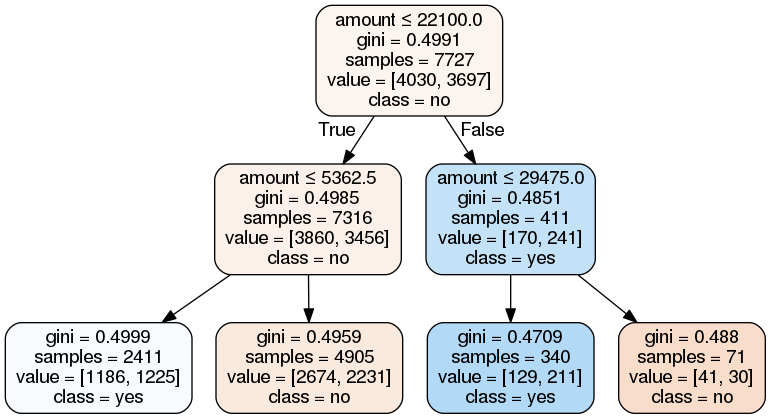

In [19]:
Image(graph.create_png())

In [20]:
def plot_boundaries(X2, clf):
    x_min, x_max = X2.iloc[:, 0].min() - 1, X2.iloc[:, 0].max() + 1
    y_min, y_max = X2.iloc[:, 1].min() - 1, X2.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, (x_max - x_min)/100), 
                         np.arange(y_min, y_max, (y_max - y_min)/100))
    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,1]
    Z = Z.reshape(xx.shape)
    target = clf.predict(X2)
    plt.scatter(x = X2.iloc[:,0], y = X2.iloc[:,1], c = y, s = 20, cmap=plt.cm.magma)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.viridis, alpha = 0.4)

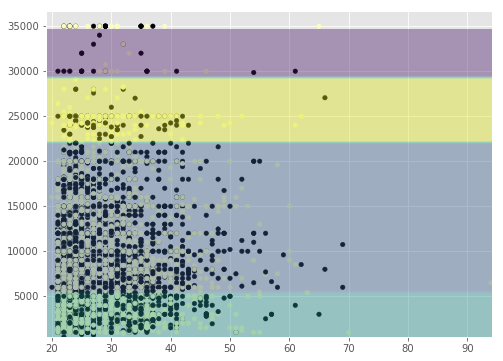

In [21]:
plot_boundaries(X_2, clf_dt)

### Proviamo a costruirne uno con profondità 5

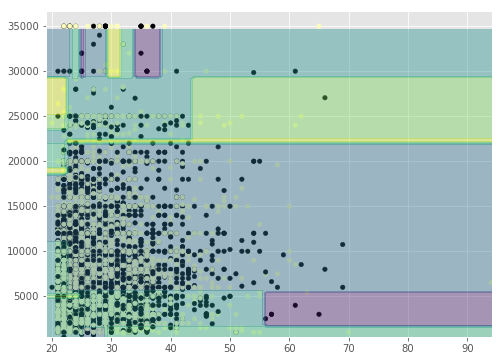

In [22]:
clf_dt_5 = tree.DecisionTreeClassifier(max_depth=5).fit(X_2,y)
plot_boundaries(X_2, clf_dt_5)

### Sta funzionando? Non direi...

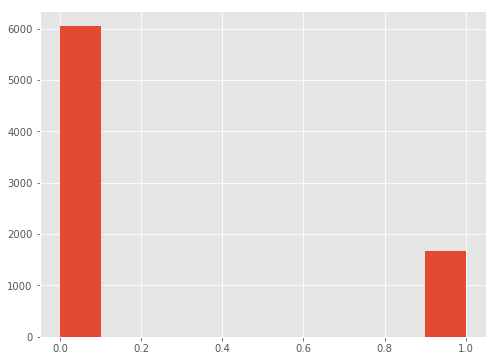

In [23]:
pred_class = clf_dt_5.predict(X_2)
plt.hist(pred_class);

# Validazione del modello

### Come facciamo a scegliere tra un modello e un altro?
## Calcoliamo quanto sbaglia rispetto ai dati che abbiamo 

### Vari tipi di metriche

- Sum of Square Error
- Area under Curve (ROC) -> Classificatori Binari

## AREA UNDER CURVE (ROC)

- Si costruisce un grafico che rappresenti la relazione tra sensitività (veri positivi, asse y) e la specificità (falsi positivi, asse x)
- usati per la prima volta nella seconda guerra mondiale per individuare i nemici usando i radar.
- Una curva ROC è il grafico dell'insieme delle coppie (FP, TP) al variare del parametro del classificatore.


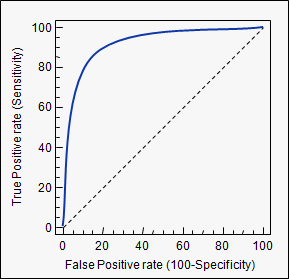

In [24]:
Image("img/roc.png")

### due curve limite:

- una che taglia il grafico a 45°. Questa retta rappresenta il caso del classificatore casuale. Il suo valore è 0.5
- curva rappresentata dal segmento che dall'origine sale al punto (0,1) e da quello che congiunge il punto (0,1) a (1,1). Rappresenta il classificatore perfetto e il suo valore è 1.

# Calcolo dell'errore generalizzato e misura del modello:
## Cross-validation

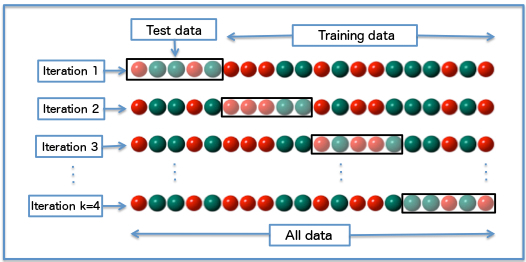

In [25]:
Image("img/cv.jpg")

In [26]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score

### Algoritmo per ottenere la media della valutazione ROC usando la Cross-Validation

- Generazione dei k-fold
- Per ogni fold
    - Training del modello
    - Previsione
    - Calcolo dell'accuratezza.
- Calcolo della media delle accuratezze

### Prepariamo l'occorrente

In [27]:
X = df_encoded.iloc[:,1:]
y = df_encoded.iloc[:,0]

In [28]:
def cross_val(clf, k):
    
    kf = StratifiedKFold(n_splits=k)
    
    kfold_auc_score = []

    for train_index, test_index in kf.split(X,y):
        clf = clf.fit(X.iloc[train_index], y.iloc[train_index])
        dt_prediction = clf.predict_proba(X.iloc[test_index])[:,1]
        auc_score = roc_auc_score(y.iloc[test_index],dt_prediction)
        print(auc_score)
        kfold_auc_score.append(auc_score)
    
    print("Media roc della cross validation:", np.mean(kfold_auc_score))

In [29]:
clf_dt_2 = tree.DecisionTreeClassifier(max_depth=2)
print("Cross validation: profondità = 2, k = 3")
cross_val(clf_dt_2, 3)
print("")
print("Cross validation: profondità = 2, k = 5")
cross_val(clf_dt_2, 5)


Cross validation: profondità = 2, k = 3
0.626445552369
0.634841191943
0.712316327567
Media roc della cross validation: 0.657867690626

Cross validation: profondità = 2, k = 5
0.642202903896
0.606714841392
0.63267291659
0.696277411968
0.706100558397
Media roc della cross validation: 0.656793726449


In [30]:
clf_dt_5 = tree.DecisionTreeClassifier(max_depth=5)
cross_val(clf_dt_5, 5)

0.653413587285
0.634923043391
0.654500918349
0.713544727131
0.730137131191
Media roc della cross validation: 0.677303881469


### Caratteristica principale degli Alberi Decisionali

# Bias basso e varianza alta!

- Bias nullo vuol dire che possiamo sempre fare domande fino a distinguere correttamente tutti gli elementi uno dall'altro.

- Varianza alta perchè costruire un simile albero è possibile in molti modi.

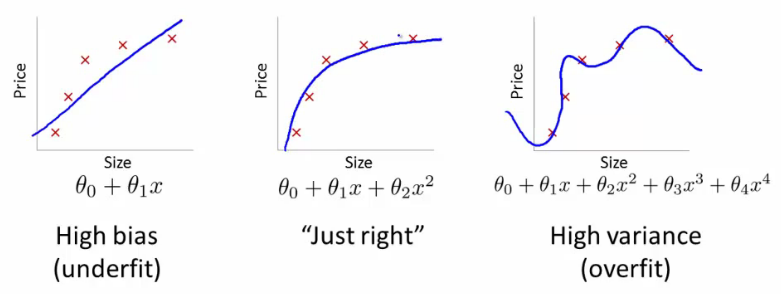

In [31]:
Image("img/tradeoff.png")

# Come ridurre la varianza?

- ridurre il numero di nodi nell'albero
- usare una metodologia di ensamble: es. Random Forest

- Lo scopo è combinare la predizione di molti stimatori per migliorare la generalizzazione delle regole.

- Come? Costruire molti alberi diversi e poi fare la media delle previsioni. Usando questa media, la stima è di solito migliore rispetto al singolo perchè la varianza è minore.

## Random Forest
Nelle foreste randomiche, ogni albero è costruito a partire da esempi presi a caso dal dataset. In più, per decidere la divisione del ramo, viene scelto quello migliore su una selezione casuale delle features.

- leggero aumento del bias
- diminuzione della varianza

In [32]:
from sklearn.ensemble import RandomForestClassifier

clf_rf = RandomForestClassifier(n_estimators=10)
cross_val(clf_rf, 5)

0.674968144323
0.658616960633
0.677091133146
0.733588075899
0.762857728068
Media roc della cross validation: 0.701424408414


In [33]:
clf_rf_100 = RandomForestClassifier(n_estimators=100)
cross_val(clf_rf_100, 5)

0.704159680773
0.688216752733
0.719736448893
0.780339940299
0.808187578278
Media roc della cross validation: 0.740128080195


### Modello Finale:
## Random Forest (100 alberi)

In [34]:
final_model = RandomForestClassifier(n_estimators=100)
final_model = final_model.fit(X, y)

## Serializzazione del modello

Processare 7727 righe è stato facile, ma se dobbiamo elaborare un modello su vari Gb di dati?

# Elaboriamo una tantum e ci salviamo il classificatore già istruito!

In [35]:
from sklearn.externals import joblib

# dumpiamo il classificatore
joblib.dump(final_model, "model.pkl")

# e le classi di cui abbiamo fatto l'encoding
joblib.dump(le_grade, "le_grade.pkl")
joblib.dump(le_ownership, "le_ownership.pkl");

# Deploy as a Service

# Sfide

* Scrivere una api per usare il modello
* Dobbiamo autenticare l'utente
* Come validiamo i dati?
* Dobbiamo scrivere anche una libreria Client?

# FIREFLY

https://github.com/rorodata/firefly

Si installa con:

	pip install firefly-python

### Come funziona

In [36]:
# varianza.py
def varianza_popolazione(array):
    media = np.mean(array) 
    return np.sum((elemento - media)**2 
        for elemento in array) / len(array) 

print(varianza_popolazione([5,5,8,12,15,18]))

24.25


Avvio del web service:

	$ firefly varianza.varianza_popolazione
	[INFO] Starting gunicorn 19.7.1
	[INFO] Listening at: http://127.0.0.1:8000
	...

### Istanziare un Client è molto semplice

	>>> from firefly.client import Client
	>>> client = Client("http://127.0.0.1:8000")
	>>> client.varianza_popolazione([5,5,8,12,15,18])
	24.25

### E avremo gratis anche REST

$ curl -d '[5,5,8,12,15,18]' http://127.0.0.1:8000/varianza_popolazione
	
    24.25

In [37]:
import warnings
warnings.filterwarnings('ignore')

In [38]:
# model.py

from sklearn.externals import joblib
model = joblib.load('model.pkl')

def predict(features):
    """
    features = [amount,grade,years,ownership,income,age]
    """
    result = model.predict(features)
    return int(result[0])

print(predict([4000,2,2.00,3,20000,28]))  # -> 1
print(predict([1000,1,2.00,3,19200,24]))  # -> 0

1
0


Avviamo il server:

    $ firefly model.predict
	...

e usiamo la funzione nel client:

	>>> remote_model = Client("http://localhost:8080/")
	>>> remote_model.predict([4000,2,2.00,3,20000,28])
	1

Infine, possiamo anche passare un token di autorizzazione:

    $ firefly --token abcd1234 model.predict
	...

Ovviamente, il client dovrà usare lo stesso token per autenticarsi.

	>>> client = Client("http://127.0.0.1:8000", 
                    auth_token="abcd1234")
	>>> client.predict([1000,1,2.00,3,19200,24])
	0

# Links

- https://github.com/amitkaps/full-stack-data-science (Repo originale del workshop)

- https://github.com/alessandrocucci/mlaas (Repo di queste slides)

### Q&A Slide